# Random Processes and Monte Carlo Methods
<ul>
    <li>Random Numbers</li>
        <ul>
            <li>Random number generators</li>
            <li>Random Seeds</li>
        </ul>
    <li>Monte Carlo Integration</li>
    <li>Markov Chain Monte Carlo Method</li>
        <ul>
            <li>Random Walks</li>
            <li>Markov Chains</li>
            <li>Metropolis Algorithm</li>
        </ul>
</ul>

## Random Numbers

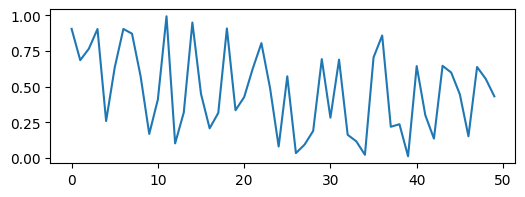

In [11]:
import random
import matplotlib.pyplot as plt

random.seed(20)

X = list(range(50))
Y = [random.random() for i in X]

plt.figure(figsize=(6,2))
plt.plot(X, Y)
plt.show()

## Monte Carlo Integration

In [15]:
import numpy as np
from numpy import random

random.seed(101)

N = 10000000
C = 0
for i in range(N):
    x = 2*random.random()-1
    y = 2*random.random()-1
    if x*x + y*y < 1:
        C += 1
print(4*C/N)

3.1413372


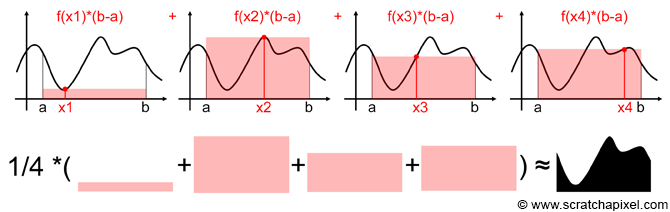

In [19]:
import random 

def f(x):
    return x*x

def MCI(a, b, N):
    S = 0
    for i in range(N):
        x = (b-a)*random.random() + a
        S += f(x)
    return (b-a)*S/N

I = MCI(0,3, 10000000)
print(I)

9.000413936938708


## Random Walk

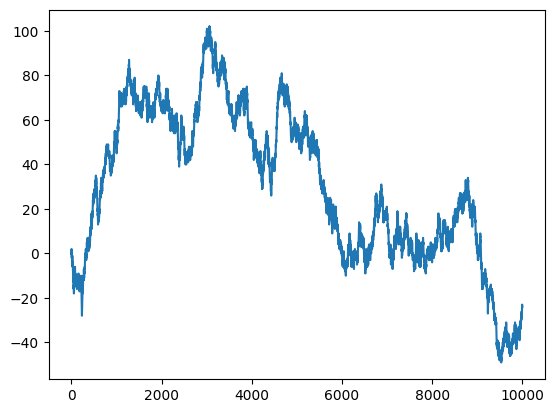

In [20]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

random.seed()

p = 1/2  # probability of right move
N = 10000 # number of steps
X = [0]   # starting position
x = 0
for i in range(N):
  q = random.random()
    
  if q > p:
     x += 1
  else: 
     x -= 1  
  X.append(x)

T = list(range(len(X)))
plt.plot(T, X)
plt.show()

## Markov Chain

In [23]:
import numpy as np

u = np.array([0.0, 1.0, 0.0])
 
P = [[0.3,  0.5,  0.2],
     [0.4,  0.5,  0.1],
     [0.2,  0.2,  0.6]]


N = 20
for i in range(N):
  P = np.matmul(P, P)

u = np.matmul(u, P)
#v = u/u.sum()
print("u",u)
print("Steady state distributioin:")
print(P)

u [0.31578947 0.42105263 0.26315789]
Steady state distributioin:
[[0.31578947 0.42105263 0.26315789]
 [0.31578947 0.42105263 0.26315789]
 [0.31578947 0.42105263 0.26315789]]


## Markov Chain Monte Carlo 

### Metropolis Algorithm

Given a probability distribution function $P(x)$ on a discrete (countable) state space $X$, and $f: X \rightarrow R$ such that: <br>
$P(x) = f(x)/Z$ 

Goal: <br>
(a) Sample from $P(x)$ <br>
(b) Estimate E{f(x)} 

Markov chain Monte Carlo simulation now involves the following steps: <br>
l. Choose a random starting state. <br>
2. Choose a new state (move) uniformly at random from an allowed set of states.<br>
3. Calculate the value of the acceptance probability $P_a = min\{1, \frac{f(b)}{f(a)} \}$. <br>
4. With probability $P_a$ accept the change, meaning the state of the system
changes to the new state; otherwise reject it, meaning the system stays in
its current state for one more step of the calculation.<br>
5. Measure the value of the quantity of interest $f(x)$ in the current state and
add it to a running sum of such measurements. <br>
6. Repeat from step 2.<br>

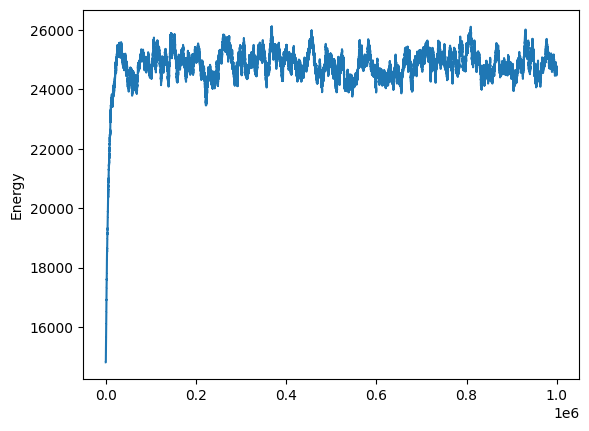

In [26]:
from math import pi, exp 
import numpy as np
from random import random, randrange, seed
import matplotlib.pyplot as plt

seed()

T = 10
N = 1000
steps = 1000000

n = np.ones([N,3] ,int)

# Main loop 
eplot = []
E = 3*N*pi*pi/2

for k in range(steps):
  # Choose the particle and the move 
  i = randrange(N)
  j = randrange(3)
  if random()<0.5:
     dn = 1
     dE = (2*n[i,j]+1)*pi*pi/2 
  else:
     dn = -1
     dE = (-2*n[i,j]+1)*pi*pi/2
      
  # Decide whether to accept the move 
  if n[i,j]>1 or dn==1:
     if random()<exp(-dE/T): # rho < f(b)/f(a)
        n[i,j] += dn
        E += dE 
  eplot.append(E)
    
# Make the graph 
plt.plot(eplot) 
plt.ylabel("Energy") 
plt.show()